In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer #Transform textual data to Numerical data

IMPORTING DATA SET FOR ANALYSIS

In [11]:
df= pd.read_csv(r'C:\Users\hp\OneDrive\Prodigy Infotech Internship\TASK04\twitter_validation.csv')

df.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


DATA EXPLORATION

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       1000 non-null   int64 
 1   Entity         1000 non-null   object
 2   Sentiment      1000 non-null   object
 3   Tweet Content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [13]:
df.describe()

,Tweet ID
count,1000.000000
mean,6432.088000
std,3728.310569
min,6.000000
25%,3247.750000
50%,6550.000000
75%,9661.750000
max,13197.000000


In [14]:
df.shape

(1000, 4)

DATA CLEANING

In [15]:
#1. Check for sum of missing values 
print(df.isnull().sum())

Tweet ID         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64


In [16]:
df.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [17]:
#2. Check and remove duplicates
df['Tweet ID'].drop_duplicates()

0      3364
1       352
2      8312
3      4371
4      4433
       ... 
995    4891
996    4359
997    2652
998    8069
999    6960
Name: Tweet ID, Length: 1000, dtype: int64

DATA VISUALIZATION

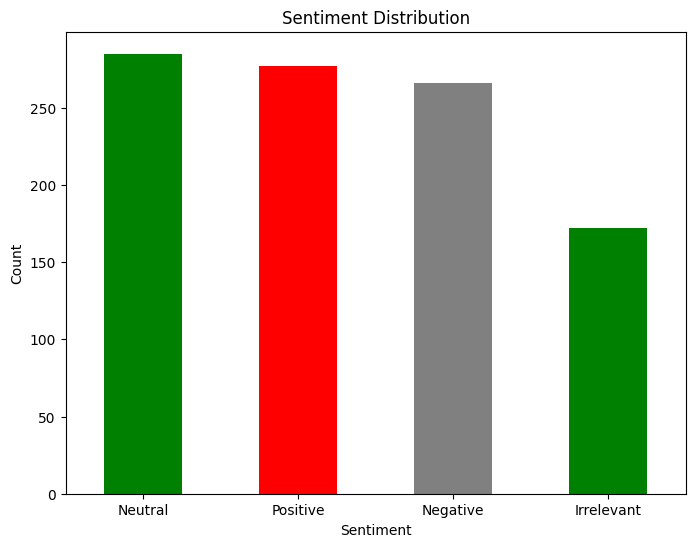

In [18]:
# Count the sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

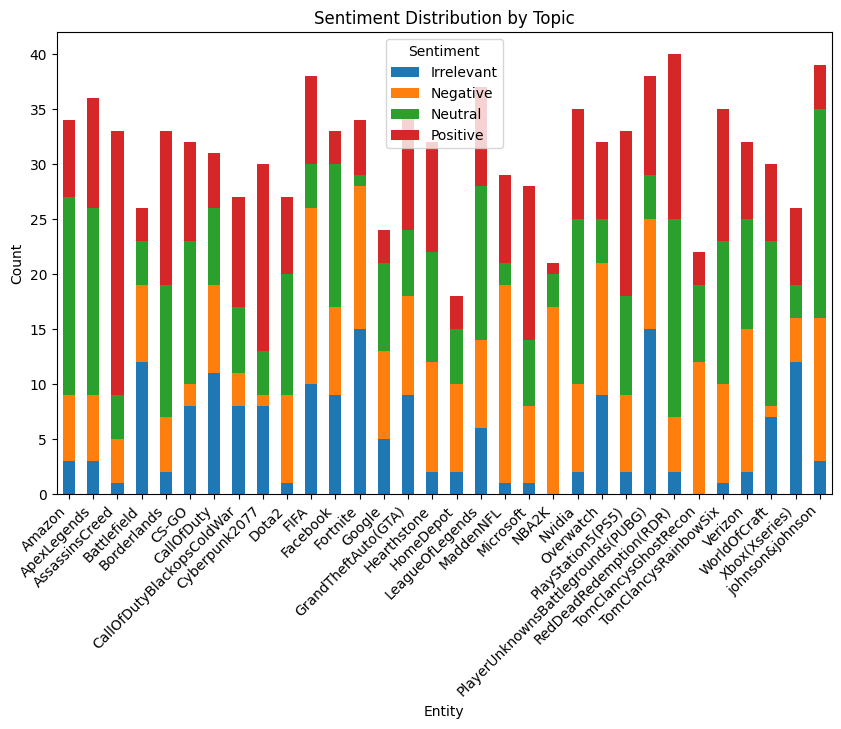

In [19]:
# Group by 'Entity' and 'Sentiment' and count occurrences
entity_sentiment = df.groupby(['Entity', 'Sentiment']).size().unstack()

# Plot the sentiment by entity
entity_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()


In [20]:
# Group by 'Sentiment' and 'Entity' to count the number of tweets
sentiment_entity_count = df.groupby(['Entity', 'Sentiment']).size().unstack()

# Filter for Positive and Negative sentiments only
positive_sentiment = sentiment_entity_count['Positive'].sort_values(ascending=False).head(5)
negative_sentiment = sentiment_entity_count['Negative'].sort_values(ascending=False).head(5)

# Display the top 5 topics for positive and negative sentiments
print("Top 5 Topics with Positive Sentiments:")
print(positive_sentiment)
print("\nTop 5 Topics with Negative Sentiments:")
print(negative_sentiment)


Top 5 Topics with Positive Sentiments:
Entity
AssassinsCreed            24.0
Cyberpunk2077             17.0
RedDeadRedemption(RDR)    15.0
PlayStation5(PS5)         15.0
Borderlands               14.0
Name: Positive, dtype: float64

Top 5 Topics with Negative Sentiments:
Entity
MaddenNFL          18.0
NBA2K              17.0
FIFA               16.0
Fortnite           13.0
johnson&johnson    13.0
Name: Negative, dtype: float64


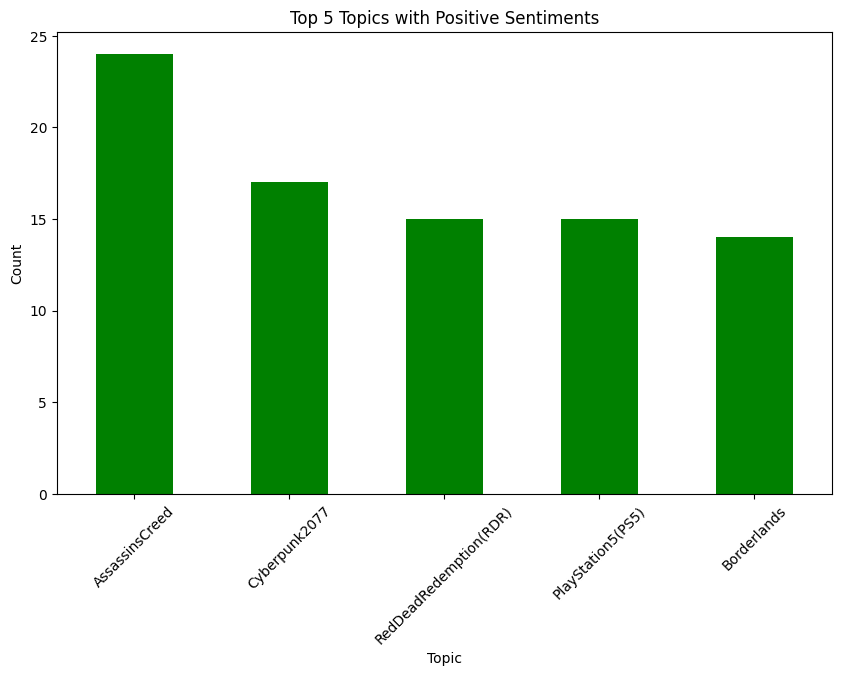

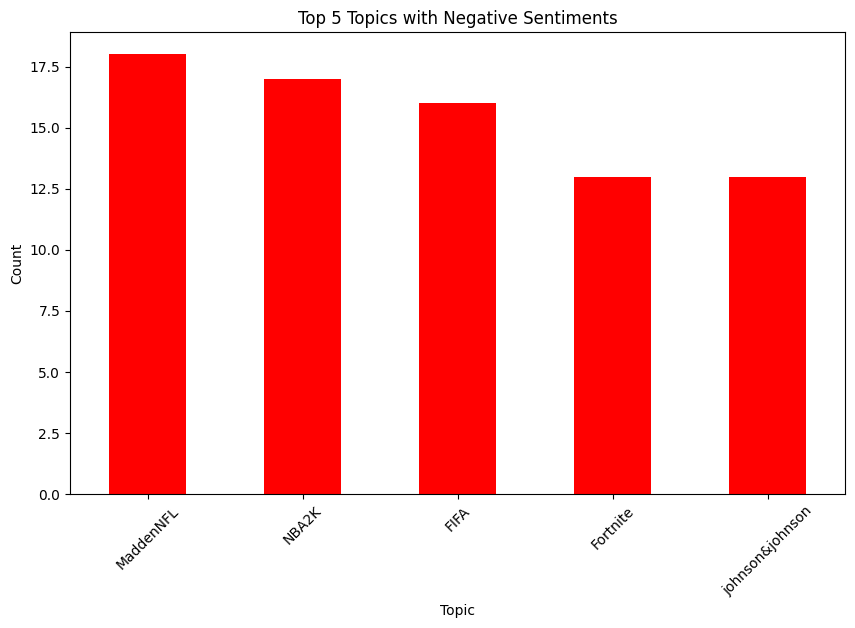

In [21]:
# Plot the Top 5 Topics with Positive Sentiments
plt.figure(figsize=(10, 6))
positive_sentiment.plot(kind='bar', color='green')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the Top 5 Topics with Negative Sentiments
plt.figure(figsize=(10, 6))
negative_sentiment.plot(kind='bar', color='red')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

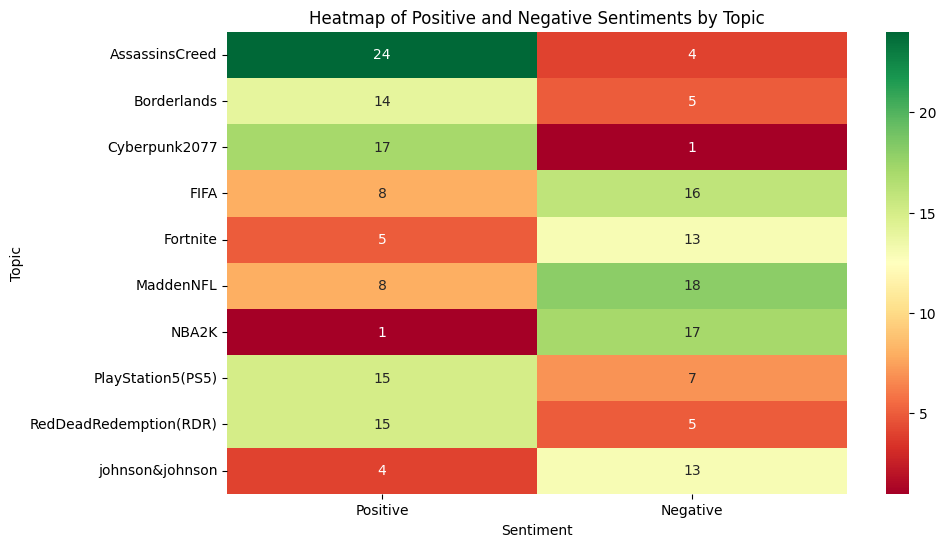

In [22]:
import seaborn as sns

# Group by 'Sentiment' and 'Entity' to count the number of tweets
sentiment_entity_count = df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)

# Sort and select the top 5 topics with Positive and Negative sentiments
top_positive = sentiment_entity_count['Positive'].sort_values(ascending=False).head(5)
top_negative = sentiment_entity_count['Negative'].sort_values(ascending=False).head(5)

# Combine the results into a single dataframe for heatmap visualization
top_sentiments = sentiment_entity_count.loc[top_positive.index.union(top_negative.index), ['Positive', 'Negative']]

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(top_sentiments, annot=True, cmap='RdYlGn', fmt='d', cbar=True)
plt.title('Heatmap of Positive and Negative Sentiments by Topic')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()

In [23]:
df.tail()

,Tweet ID,Entity,Sentiment,Tweet Content
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...
